# Multiple Explainer Performance Comparison: Benchmark Tree, Permutation, and Exact Explainers

This notebook demonstrates the use of benchmark framework to compare the performance across multiple explainers. For this purpose, tabular data is chosen and the explainers used to benchmark are: tree, permutation, and exact explainers. The metrics used to evaluate are "keep positive" and "keep negative". The masker used is Independent Masker but can also generalize to other tabular maskers.

The new benchmark utility uses the new API with MaskedModel as wrapper around user-imported model and evaluates masked values of inputs.

Please refer to 'Tabular Prediction Benchmark Demo.ipynb' for more description about this benchmarking example.

Future Work: 

1. Utilize benchmarking tool to benchmark text & image explainers against different metrics (e.g. F1 Score, etc)

2. Compare explanation results via different sorting mechanism / metrics in order to compare SHAP performance to the performance of other interpretability methods in existing literatures
    - SHAP
    - Attention distribution
    - Random order 

In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
from sklearn.model_selection import train_test_split
import shap.benchmark as benchmark

In [2]:
untrained_model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = untrained_model.fit(X_train, y_train)

In [3]:
masker = shap.maskers.Independent(X)

In [4]:
permutation_explainer = shap.Explainer(model.predict, masker, algorithm='permutation')
tree_explainer = shap.Explainer(model, masker, algorithm='tree')
exact_explainer = shap.Explainer(model.predict, masker, algorithm='exact')

In [5]:
permutation_shap_values = permutation_explainer(X_train)
tree_shap_values = tree_explainer(X_train)
exact_shap_values = exact_explainer(X_train)

Permutation explainer: 355it [01:02,  5.64it/s]                                 
Exact explainer: 355it [13:30,  2.28s/it]                                       


In [6]:
metrics = {'sort_order': ['positive', 'negative'], 'perturbation': ['keep']}

In [7]:
benchmarks = dict()
benchmarks['permutation explainer'] = benchmark.framework.get_benchmark(permutation_explainer.model, permutation_shap_values, X_train, y_train, permutation_explainer.masker, metrics)
benchmarks['tree explainer'] = benchmark.framework.get_benchmark(tree_explainer.model, tree_shap_values, X_train, y_train, tree_explainer.masker, metrics)
benchmarks['exact explainer'] = benchmark.framework.get_benchmark(exact_explainer.model, exact_shap_values, X_train, y_train, exact_explainer.masker, metrics)

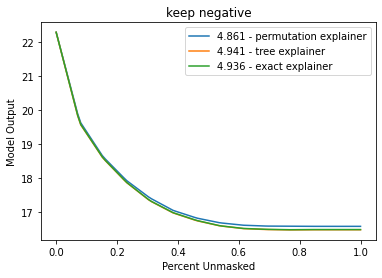

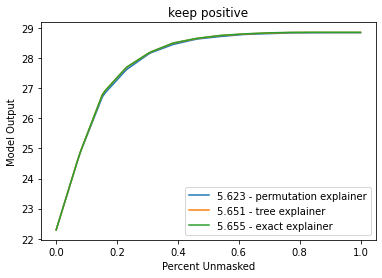

In [8]:
benchmark.framework.trend_plot(benchmarks)

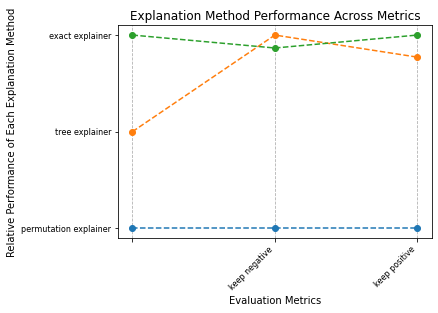

In [9]:
benchmark.framework.compare_plot(benchmarks)